In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from picoscope import ps2000

In [2]:
ps = ps2000.PS2000()

In [23]:
waveform_desired_duration = 50e-6
obs_duration = 3 * waveform_desired_duration
sampling_interval = obs_duration / 4096

(actualSamplingInterval, nSamples, maxSamples) = ps.setSamplingInterval(sampling_interval, obs_duration)

In [28]:
print(actualSamplingInterval, nSamples, maxSamples)

4e-08 3750 3968


In [31]:
ps.setChannel('A', 'DC', 10.0, 0.0, enabled=True, BWLimited=False)

ps.setChannel('B', 'DC', 10.0, 0.0, enabled=True, BWLimited=False)

ps.setSimpleTrigger('A', 1.0, 'Falling', timeout_ms=100, enabled=True) #setting a trigger


In [32]:
ps.runBlock()
ps.waitReady()

dataA = ps.getDataV('A', nSamples, returnOverflow=False)
dataB = ps.getDataV('B', nSamples, returnOverflow=False)

In [33]:
dataA.shape

(3750,)

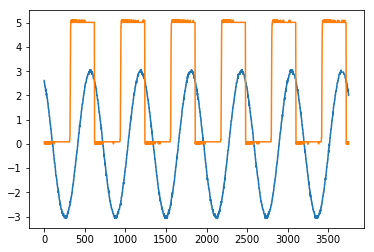

In [35]:
plt.plot(dataB)
plt.plot(dataA)
